In [42]:
!pip install xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from sklearn.linear_model import LinearRegression


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
plt.rcParams['figure.figsize'] = (12,8)
pd.set_option('display.float_format',lambda x: '%.3f' % x)

In [12]:
df = pd.read_csv("C:/Users/Charvitha Reddy/Downloads/HEALTH_DATASET.csv")
df.head()

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,claim_outcome
0,60.000,male,64,24.300,NoDisease,1,0,NewYork,72,0,0,Actor,13112.600,Approval
1,49.000,female,75,22.600,NoDisease,1,0,Boston,78,1,1,Engineer,9567.000,Approval
2,32.000,female,64,17.800,Epilepsy,2,1,Phildelphia,88,1,1,Academician,32734.200,Rejected
3,61.000,female,53,36.400,NoDisease,1,1,Pittsburg,72,1,0,Chef,48517.600,Rejected
4,19.000,female,50,20.600,NoDisease,0,0,Buffalo,82,1,0,HomeMakers,1731.700,Rejected


In [14]:
df.shape

(15000, 14)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  object 
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  object 
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  object 
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  object 
 12  claim                15000 non-null  float64
 13  claim_outcome        15000 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 1.6+ MB


In [16]:
df.describe()

,age,weight,bmi,no_of_dependents,smoker,bloodpressure,diabetes,regular_ex,claim
count,14604.000,15000.000,14044.000,15000.000,15000.000,15000.000,15000.000,15000.000,15000.000
mean,39.548,64.910,30.266,1.130,0.198,68.650,0.777,0.224,13401.438
std,14.016,13.702,6.123,1.228,0.399,19.419,0.416,0.417,12148.240
min,18.000,34.000,16.000,0.000,0.000,0.000,0.000,0.000,1121.900
25%,27.000,54.000,25.700,0.000,0.000,64.000,1.000,0.000,4846.900
50%,40.000,63.000,29.400,1.000,0.000,71.000,1.000,0.000,9545.650
75%,52.000,76.000,34.400,2.000,0.000,80.000,1.000,0.000,16519.125
max,64.000,95.000,53.100,5.000,1.000,122.000,1.000,1.000,63770.400


In [24]:
df.isnull().sum()

age                    396
sex                      0
weight                   0
bmi                    956
hereditary_diseases      0
no_of_dependents         0
smoker                   0
city                     0
bloodpressure            0
diabetes                 0
regular_ex               0
job_title                0
claim                    0
claim_outcome            0
dtype: int64

In [45]:
# Fill missing values with the mean (or use another strategy)
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

# Alternatively, drop rows with missing values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)
y_train.dropna(inplace=True)


In [18]:
df.isnull().sum()

age                    0
sex                    0
weight                 0
bmi                    0
hereditary_diseases    0
no_of_dependents       0
smoker                 0
city                   0
bloodpressure          0
diabetes               0
regular_ex             0
job_title              0
claim                  0
claim_outcome          0
dtype: int64

In [19]:
df[df.duplicated()]

,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,claim_outcome
605,46.000,female,68,30.266,NoDisease,2,0,LosAngeles,60,1,0,Dancer,8825.100,Approval
608,27.000,female,82,30.266,NoDisease,3,0,Oceanside,82,1,1,Architect,18804.800,Rejected
898,48.000,female,67,33.100,Alzheimer,0,1,Cincinnati,70,1,0,ITProfessional,40974.200,Rejected
919,26.000,male,56,23.700,NoDisease,2,0,Kingman,72,1,0,HomeMakers,3484.300,Approval
970,48.000,female,70,28.900,NoDisease,1,0,KanasCity,72,0,0,Architect,9249.500,Approval
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14966,46.000,male,46,22.300,NoDisease,0,0,Louisville,72,1,0,Academician,7147.100,Approval
14971,18.000,female,53,27.300,NoDisease,3,1,Boston,85,1,0,Student,18223.500,Rejected
14987,47.000,male,94,47.500,NoDisease,1,0,Raleigh,61,1,0,Academician,8083.900,Approval
14989,44.000,male,90,38.100,NoDisease,1,0,Georgia,76,1,0,Engineer,7152.700,Approval


In [20]:
df['hereditary_diseases'].unique()

array(['NoDisease', 'Epilepsy', 'EyeDisease', 'Alzheimer', 'Arthritis',
       'HeartDisease', 'Diabetes', 'Cancer', 'High BP', 'Obesity'],
      dtype=object)

In [21]:
df['city'].nunique()

91

In [22]:
df['job_title'].value_counts().head()

Student       1320
HomeMakers     972
Singer         744
Actor          720
FilmMaker      714
Name: job_title, dtype: int64

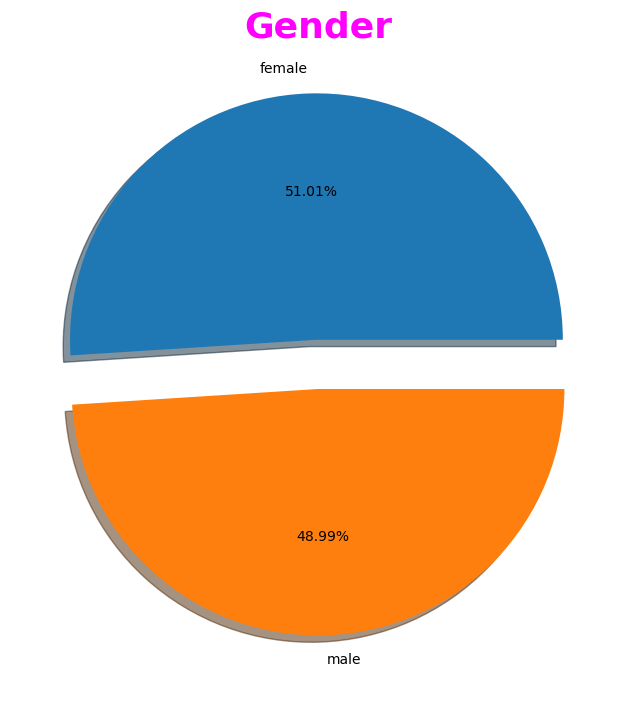

In [23]:
values = df.sex.value_counts().values
labels = ['female','male']
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
plt.title('Gender',pad=32,fontsize=26,fontweight='bold',color='fuchsia')
plt.show()

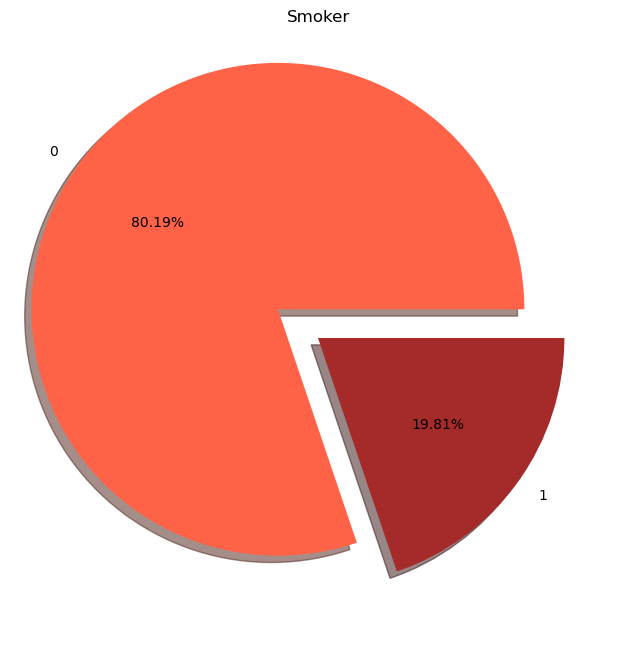

In [24]:
values = df.smoker.value_counts().values
labels = df.smoker.value_counts().keys()
explode = (0.2,0)

plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%',colors=['tomato','brown'])
plt.title('Smoker')
plt.show()

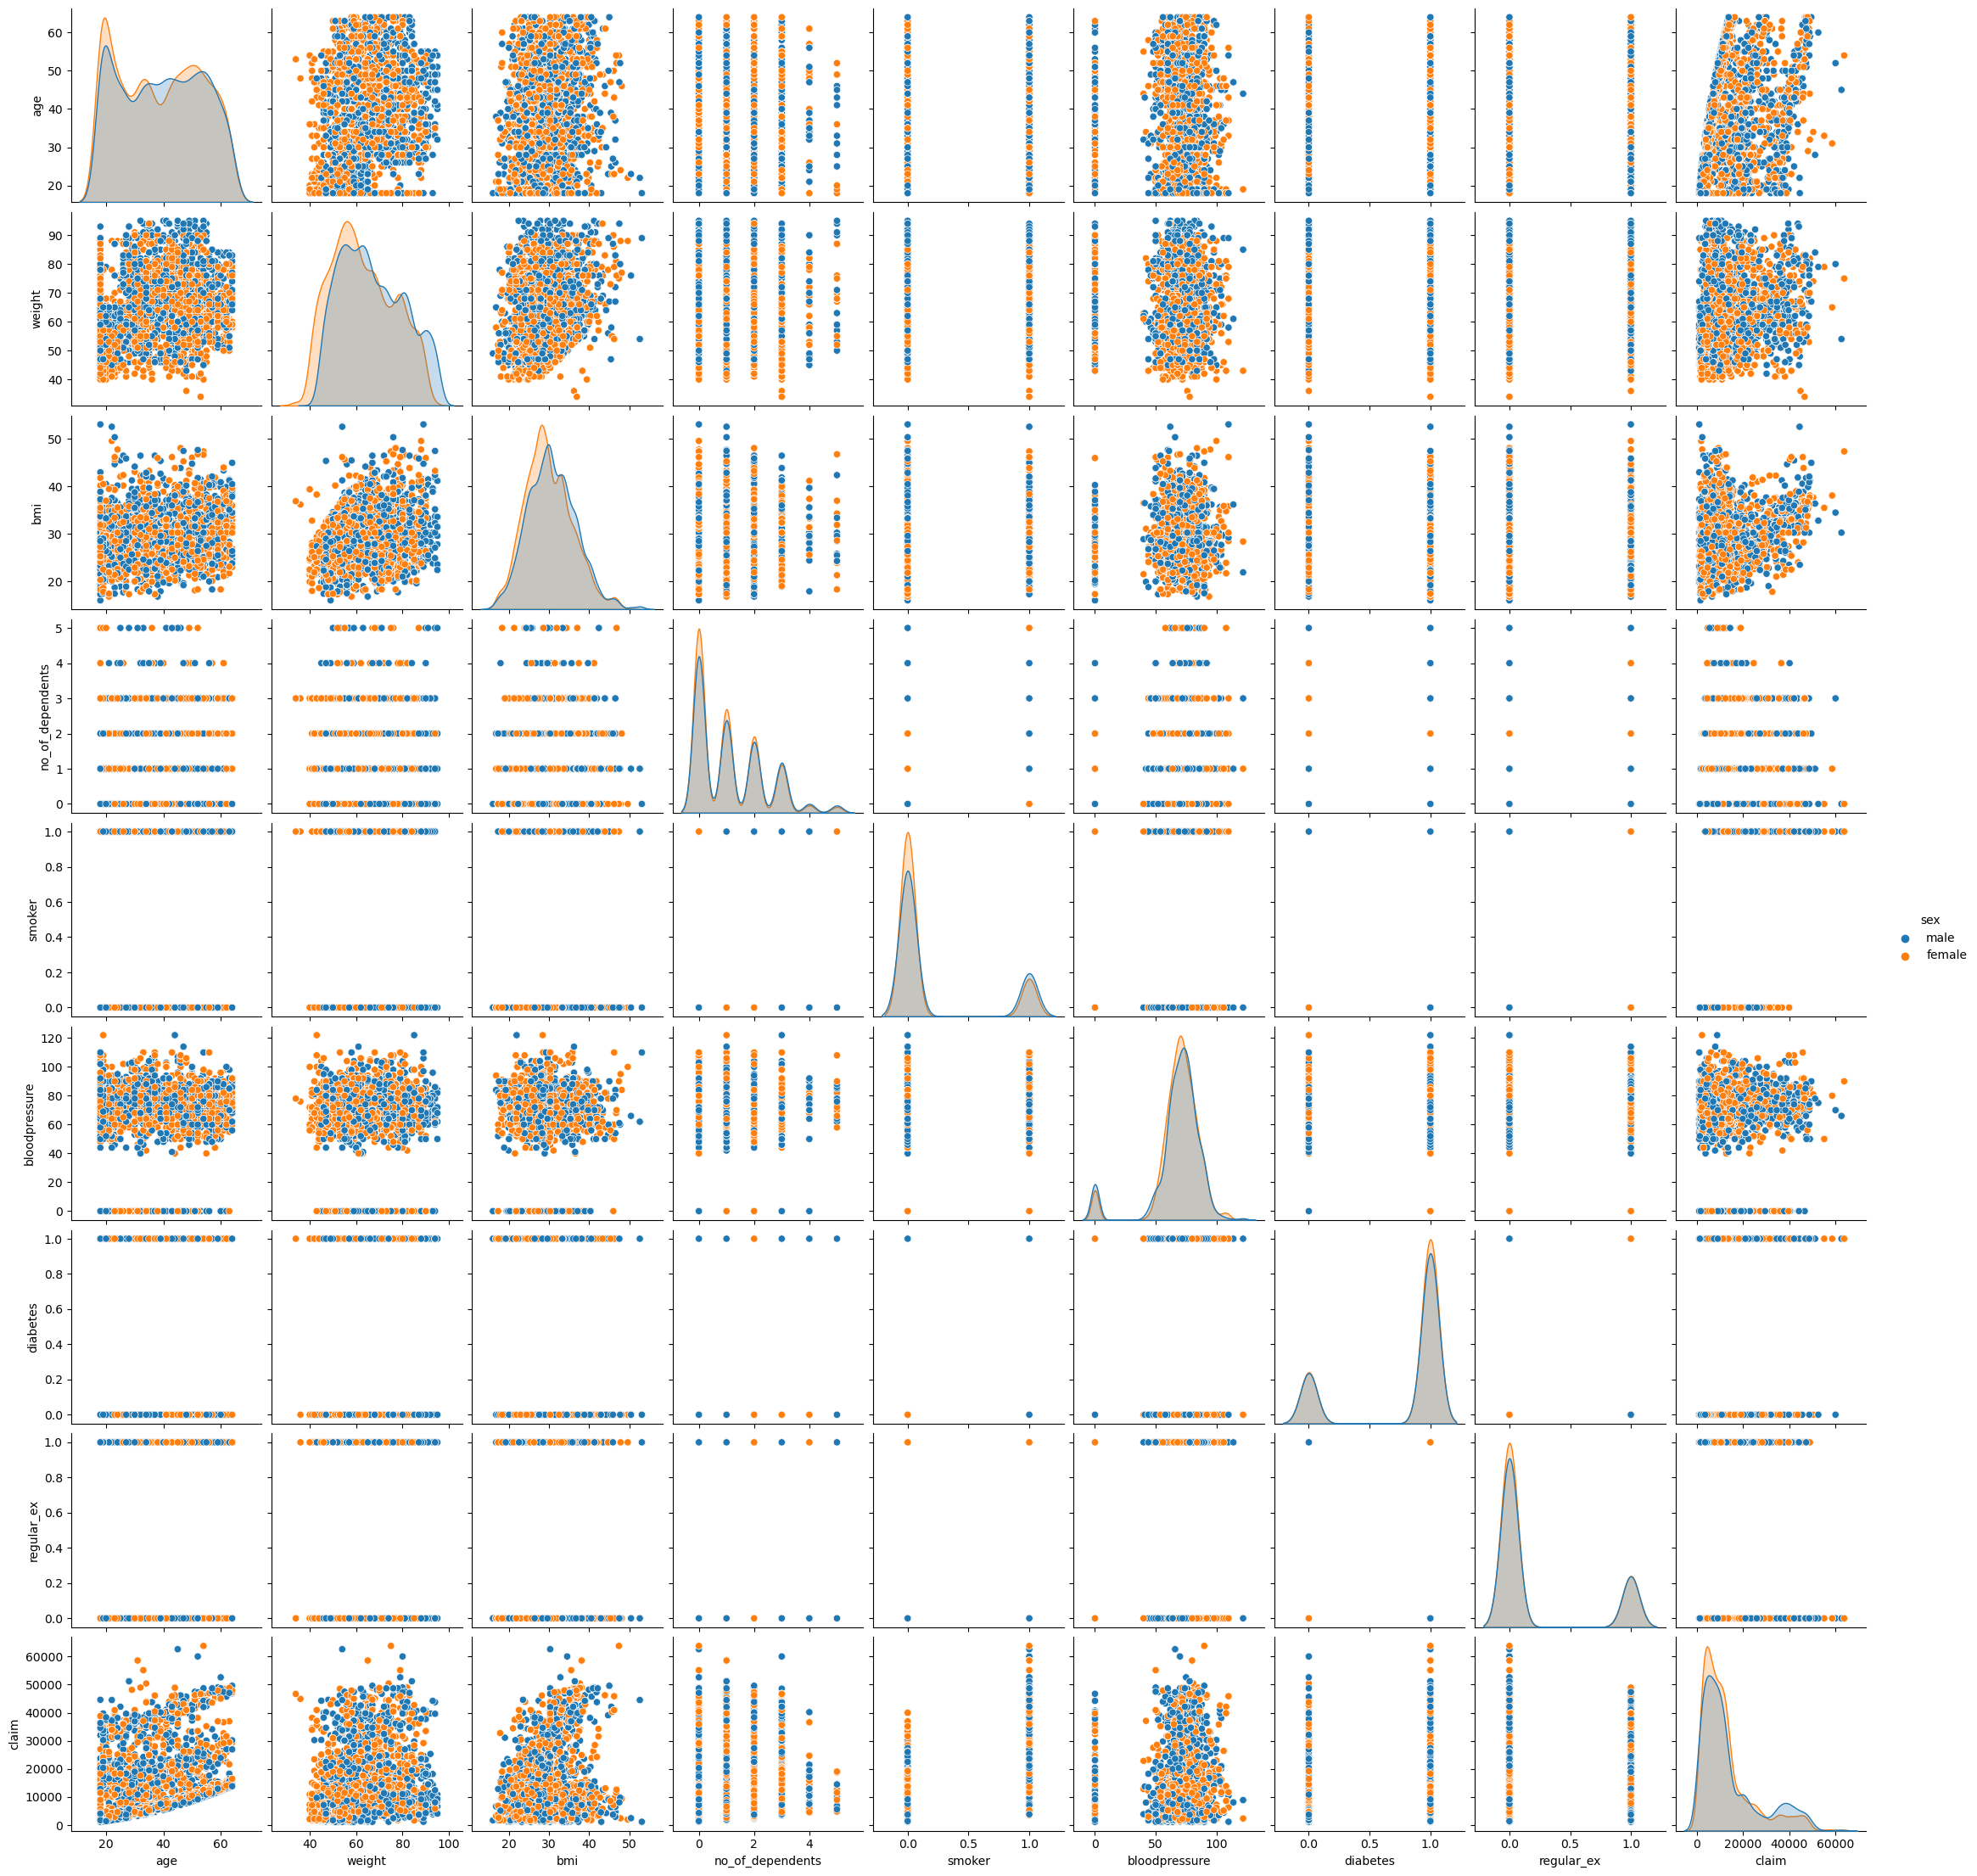

In [25]:
sns.pairplot(df,hue='sex')

<AxesSubplot:>

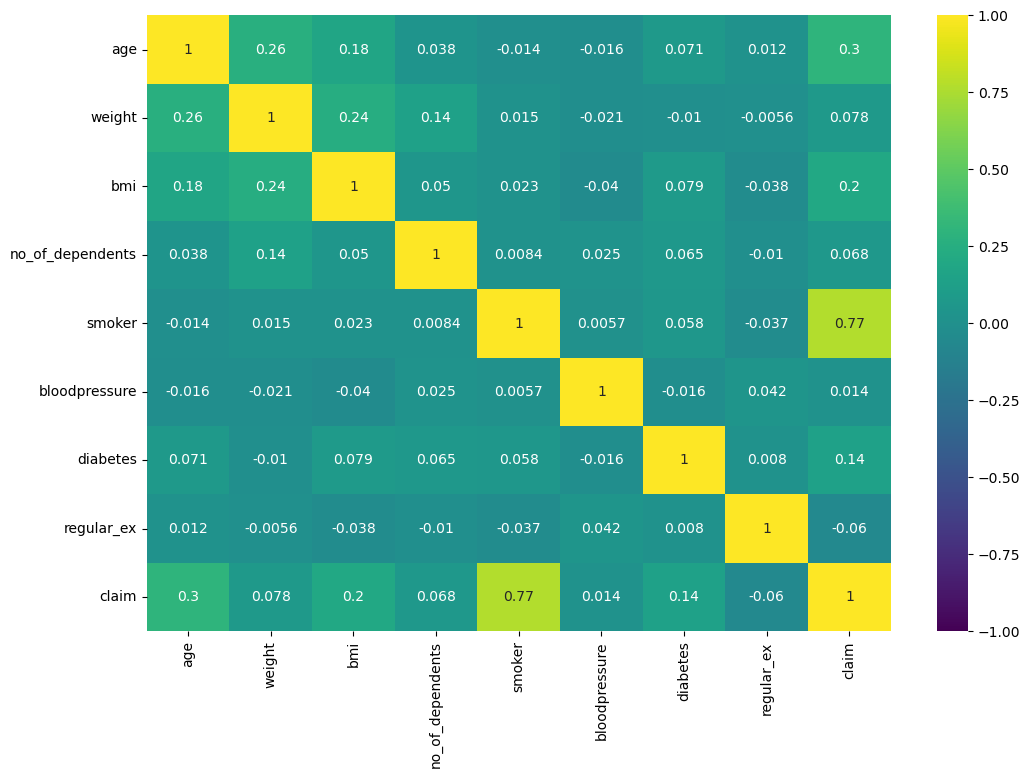

In [26]:
sns.heatmap(df.corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)

In [27]:
job_titles_bmi = df.groupby('job_title')['bmi'].mean().sort_values(ascending=False).reset_index()[:10]
job_titles_bmi

,job_title,bmi
0,CA,32.375
1,ITProfessional,32.063
2,Analyst,31.910
3,Technician,31.579
4,Manager,31.530
5,Politician,31.469
6,Buisnessman,31.208
7,HouseKeeper,31.197
8,Clerks,31.181
9,FilmDirector,31.113


In [34]:
# Replace categorical values in 'sex' column
df.sex.replace(['female', 'male'], [0, 1], inplace=True)
df.sex = df.sex.astype(int)

# Replace categorical values in 'claim_outcome' column
df.claim_outcome.replace(['Approval', 'Rejected'], [1, 0], inplace=True)
df.claim_outcome = df.claim_outcome.astype(int)


In [35]:
df


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim,claim_outcome
0,60.000,1,64,24.300,8,1,0,55,72,0,0,2,13112.600,0
1,49.000,0,75,22.600,8,1,0,5,78,1,1,16,9567.000,0
2,32.000,0,64,17.800,4,2,1,63,88,1,1,0,32734.200,1
3,61.000,0,53,36.400,8,1,1,64,72,1,0,10,48517.600,1
4,19.000,0,50,20.600,8,0,0,8,82,1,0,22,1731.700,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,39.000,1,49,28.300,8,1,1,24,54,1,0,20,21082.200,1
14996,39.000,1,74,29.600,8,4,0,49,64,1,0,33,7512.300,0
14997,20.000,1,62,33.300,8,0,0,82,52,1,0,18,1391.500,0
14998,52.000,1,88,36.700,8,0,0,61,70,1,0,17,9144.600,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  14604 non-null  float64
 1   sex                  15000 non-null  int32  
 2   weight               15000 non-null  int64  
 3   bmi                  14044 non-null  float64
 4   hereditary_diseases  15000 non-null  int32  
 5   no_of_dependents     15000 non-null  int64  
 6   smoker               15000 non-null  int64  
 7   city                 15000 non-null  int32  
 8   bloodpressure        15000 non-null  int64  
 9   diabetes             15000 non-null  int64  
 10  regular_ex           15000 non-null  int64  
 11  job_title            15000 non-null  int32  
 12  claim                15000 non-null  float64
 13  claim_outcome        15000 non-null  int32  
dtypes: float64(3), int32(5), int64(6)
memory usage: 1.3 MB


In [37]:
le = LabelEncoder()
df.city = le.fit_transform(df.city)
df.city = df.city.astype(int)
df.job_title = le.fit_transform(df.job_title)
df.job_title = df.job_title.astype(int)
df.hereditary_diseases = le.fit_transform(df.hereditary_diseases)
df.hereditary_diseases = df.hereditary_diseases.astype(int)

In [39]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Initialize the StandardScaler
scaler = StandardScaler()

# Define the feature columns (exclude target column if necessary)
feature_columns = df.columns.difference(['claim_outcome'])

# Fit and transform the feature columns
scaled_features = scaler.fit_transform(df[feature_columns])

# Create a DataFrame with the scaled features
scaled_df = pd.DataFrame(scaled_features, columns=feature_columns)

# Add the target column back to the scaled DataFrame
scaled_df['claim_outcome'] = df['claim_outcome'].values

# Display the first few rows of the scaled DataFrame
scaled_df.head()


,age,bloodpressure,bmi,city,claim,diabetes,hereditary_diseases,job_title,no_of_dependents,regular_ex,sex,smoker,weight,claim_outcome
0,1.459,0.173,-0.974,0.379,-0.024,-1.867,0.215,-1.598,-0.106,-0.537,1.020,-0.497,-0.066,0
1,0.674,0.482,-1.252,-1.549,-0.316,0.536,0.215,-0.255,-0.106,1.861,-0.980,-0.497,0.736,0
2,-0.539,0.996,-2.036,0.688,1.591,0.536,-2.982,-1.789,0.708,1.861,-0.980,2.012,-0.066,1
3,1.531,0.173,1.002,0.727,2.891,0.536,0.215,-0.831,-0.106,-0.537,-0.980,2.012,-0.869,1
4,-1.466,0.688,-1.579,-1.433,-0.961,0.536,0.215,0.320,-0.920,-0.537,-0.980,-0.497,-1.088,1


In [40]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = scaled_df.drop('claim_outcome', axis=1)
y = scaled_df['claim_outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)


In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM [samples, timesteps, features]
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=1)


In [65]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Assuming X_train is already reshaped correctly and y_train is binary
# If X_train is not in 3D shape, you need to reshape it:
# X_train = X_train.reshape((X_train.shape[0], timesteps, features))
# Example: X_train.shape should be (samples, timesteps, features)

# Ensure y_train is in the correct binary format
# If y_train is categorical, use to_categorical:
# y_train = to_categorical(y_train)

# Build LSTM model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")


Epoch 1/10
244/244 [==============================] - 4s 6ms/step - loss: nan - accuracy: 0.6895 - val_loss: nan - val_accuracy: 0.6882
Epoch 2/10
244/244 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.6917 - val_loss: nan - val_accuracy: 0.6882
Epoch 3/10
244/244 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.6917 - val_loss: nan - val_accuracy: 0.6882
Epoch 4/10
244/244 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.6917 - val_loss: nan - val_accuracy: 0.6882
Epoch 5/10
244/244 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.6917 - val_loss: nan - val_accuracy: 0.6882
Epoch 6/10
244/244 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.6917 - val_loss: nan - val_accuracy: 0.6882
Epoch 7/10
244/244 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.6917 - val_loss: nan - val_accuracy: 0.6882
Epoch 8/10
244/244 [============================

In [66]:
# Extract features from the LSTM model
feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer(index=-2).output)

X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)


165/165 [==============================] - 0s 2ms/step


In [67]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


xgb_classifier.fit(X_train_features, y_train)


y_pred = xgb_classifier.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy with LSTM features:", accuracy)


XGBoost Accuracy with LSTM features: 0.6975238095238095


In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.6975238095238095
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Confusion Matrix:
 [[3662    0]
 [1588    0]]


In [71]:
print("Class distribution in y_test:")
print(y_test.value_counts())


Class distribution in y_test:
0    3662
1    1588
Name: claim_outcome, dtype: int64


In [5]:
!pip install pycaret
import pandas as pd

# Replace 'your_dataset.csv' with the path to your dataset file
df = pd.read_csv("C:/Users/Charvitha Reddy/Downloads/HEALTH_DATASET.csv")

from pycaret.classification import *

# Setup the PyCaret environment
clf1 = setup(data=df, target='claim_outcome', session_id=123, normalize=True, transformation=True, ignore_features=['claim'], fix_imbalance=True)



[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


,Description,Value
0,Session id,123
1,Target,claim_outcome
2,Target type,Binary
3,Target mapping,"Approval: 0, Rejected: 1"
4,Original data shape,"(15000, 14)"
5,Transformed data shape,"(19058, 22)"
6,Transformed train set shape,"(14558, 22)"
7,Transformed test set shape,"(4500, 22)"
8,Ignore features,1
9,Numeric features,8


In [12]:
import pandas as pd
from pycaret.classification import setup, compare_models, pull

best_model = compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9963,0.9991,0.9963,0.9963,0.9963,0.9913,0.9913,0.4010
rf,Random Forest Classifier,0.9956,0.9997,0.9956,0.9956,0.9956,0.9897,0.9897,0.3460
xgboost,Extreme Gradient Boosting,0.9951,0.9988,0.9951,0.9952,0.9951,0.9886,0.9886,0.5010
et,Extra Trees Classifier,0.9943,0.9996,0.9943,0.9943,0.9943,0.9865,0.9866,0.3020
dt,Decision Tree Classifier,0.9937,0.9926,0.9937,0.9937,0.9937,0.9852,0.9852,0.1430
gbc,Gradient Boosting Classifier,0.9929,0.9983,0.9929,0.9929,0.9928,0.9831,0.9832,0.5020
ada,Ada Boost Classifier,0.9794,0.9960,0.9794,0.9796,0.9795,0.9518,0.9519,0.2820
knn,K Neighbors Classifier,0.9772,0.9941,0.9772,0.9775,0.9773,0.9468,0.9469,1.3400
svm,SVM - Linear Kernel,0.9590,0.9805,0.9590,0.9600,0.9592,0.9048,0.9053,0.1530
lr,Logistic Regression,0.9563,0.9804,0.9563,0.9576,0.9566,0.8987,0.8995,1.6960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [21]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9958,0.9993,0.9958,0.9958,0.9958,0.9900,0.9901


,age,sex,weight,bmi,hereditary_diseases,no_of_dependents,smoker,city,bloodpressure,diabetes,regular_ex,job_title,claim_outcome,prediction_label,prediction_score
14720,53.0,female,65,38.099998,NoDisease,3,0,Indianapolis,62,1,1,HomeMakers,Approval,Approval,0.9996
7216,27.0,male,53,18.900000,NoDisease,3,0,Stamford,90,1,0,Doctor,Rejected,Rejected,1.0000
1734,56.0,male,83,25.900000,NoDisease,0,0,Bakersfield,78,1,0,Lawyer,Approval,Approval,0.9999
1583,32.0,female,54,33.200001,NoDisease,3,0,Harrisburg,68,1,0,Accountant,Approval,Approval,0.9998
3320,36.0,male,55,34.400002,NoDisease,2,0,Providence,56,0,0,Accountant,Approval,Approval,0.9996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,46.0,male,81,19.900000,NoDisease,0,0,Georgia,58,0,0,Engineer,Approval,Approval,0.9999
14923,44.0,female,46,25.000000,NoDisease,1,0,Atlanta,86,1,0,DefencePersonnels,Rejected,Rejected,0.9999
2811,21.0,male,61,23.799999,NoDisease,2,0,Phildelphia,60,1,0,Blogger,Approval,Approval,0.9999
4911,35.0,male,80,NaN,NoDisease,1,0,Raleigh,70,0,0,Clerks,Approval,Approval,0.9999


In [22]:
from pycaret.classification import save_model, load_model

# Save the best model
save_model(best_model, model_name='best_lightgbm_model')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'weight', 'bmi',
                                              'no_of_dependents', 'smoker',
                                              'bloodpressure', 'diabetes',
                                              'regular_ex'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                       

In [23]:
# Load the saved model
model = load_model('best_lightgbm_model')

# Assuming 'test_data' is a DataFrame containing the test set
test_data = pd.read_csv("C:/Users/Charvitha Reddy/Downloads/HEALTH_DATASET.csv")

from pycaret.classification import predict_model

predictions = predict_model(model, data=test_data)

# Inspect the columns of the predictions DataFrame
print(predictions.columns)

# Extract true labels and predicted labels
y_true = test_data['claim_outcome']

# Check available columns in predictions DataFrame to find the correct one
# Print first few rows to inspect
print(predictions.head())

# If the predictions DataFrame contains 'prediction_label' instead of 'Label', adjust accordingly
y_pred = predictions['prediction_label'] if 'prediction_label' in predictions.columns else predictions['Label']

# Generate evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
print('ROC AUC Score:', roc_auc_score(y_true, predictions['prediction_score']))

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9987,0.9998,0.9987,0.9987,0.9987,0.9970,0.9970


Index(['age', 'sex', 'weight', 'bmi', 'hereditary_diseases',
       'no_of_dependents', 'smoker', 'city', 'bloodpressure', 'diabetes',
       'regular_ex', 'job_title', 'claim', 'claim_outcome', 'prediction_label',
       'prediction_score'],
      dtype='object')
    age     sex  weight        bmi hereditary_diseases  no_of_dependents  \
0  60.0    male      64  24.299999           NoDisease                 1   
1  49.0  female      75  22.600000           NoDisease                 1   
2  32.0  female      64  17.799999            Epilepsy                 2   
3  61.0  female      53  36.400002           NoDisease                 1   
4  19.0  female      50  20.600000           NoDisease                 0   

   smoker         city  bloodpressure  diabetes  regular_ex    job_title  \
0       0      NewYork             72         0           0        Actor   
1       0       Boston             78         1           1     Engineer   
2       1  Phildelphia             88         1   